## Try random forest on radom assignments and be sure it returns poor scores.

It seems that we shouldn't be able to sort on just a few metrics like period and Tmag.

I'm pretty sure the reason it does so well is because almost all of them are false positives. So a classifier


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

### Read in the data from Kelsey's file

In [2]:
ddir = "data/"
tcefile = "TESS_ML_20240412.txt"
columns = ["pass","win","type","injnum","period","tzero","power","dur","depth","snr","deptest1","deptest2",
           "stmass","stradius","chisq",
           "bicft","bicplus","bicminus","snrshape","noise","depth_shape2","depth_shape3","mindBIC",
           "nloops","npoints",
           "nintransit","26","27","28","29","30","31",
           "Tmag","Teff","logg","injrec","trprob"]
tces = pd.read_csv(ddir+tcefile, names=columns)

Only some were used by Kelsey and Jason to vet, we will start with those for training, 
I'm not sure I entirely agree with choices.

In [3]:
metrics=[ #"period",
         #"power",
         "dur",
        #"depth",
        #"snr",
         #"deptest1","deptest2",
         #"chisq",
         #"bicft","bicplus","bicminus","snrshape","noise","depth_shape2","depth_shape3",
         #"mindBIC","nloops",
         #"npoints","nintransit",
         #"26","27","28","29","30","31",
         #"Tmag", 
         "logg", "Teff"
         ]

X = np.array(tces[metrics])
X[~np.isfinite(X)] = -9999

#Here we define the test and training sets using a routine written by Scikitlearn
X_train, X_test, y_train, y_test = train_test_split(X, tces['injrec'], test_size=0.2)
print(len(X_train), len(X_test))
print(len(X))
print(X_train[0:20])

184312 46078
230390
[[8.15390e-02 4.40000e+00 4.27900e+03]
 [3.01226e-01 4.28838e+00 5.09100e+03]
 [3.83216e-01 4.40000e+00 5.80000e+03]
 [4.80963e-01 4.15138e+00 4.94500e+03]
 [1.76270e-01 4.15991e+00 4.09900e+03]
 [2.04524e-01 4.59471e+00 5.49600e+03]
 [7.34222e-01 4.70702e+00 6.04500e+03]
 [3.32299e-01 4.29652e+00 5.84600e+03]
 [6.07450e-02 4.78302e+00 5.73200e+03]
 [3.94875e-01 4.52656e+00 4.39300e+03]
 [1.87788e-01 4.59784e+00 5.50500e+03]
 [2.52934e-01 4.53139e+00 5.89200e+03]
 [4.40423e-01 4.19796e+00 4.72800e+03]
 [3.08465e-01 3.91945e+00 5.97400e+03]
 [3.21561e-01 4.40000e+00 5.11700e+03]
 [1.48163e-01 4.34943e+00 5.74600e+03]
 [4.23119e-01 4.35193e+00 6.03800e+03]
 [7.53074e-01 4.48684e+00 5.85600e+03]
 [1.54294e-01 4.18759e+00 4.92400e+03]
 [1.20590e-01 4.21148e+00 5.81700e+03]]


In [4]:
rf = RandomForestClassifier(n_estimators=40,max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
scores= cross_val_score(rf, X_train, y_train, cv=6)
print("Cross Validation Score mean: %f" % scores.mean())

Cross Validation Score mean: 0.913907


Accuracy: 0.912973653370372


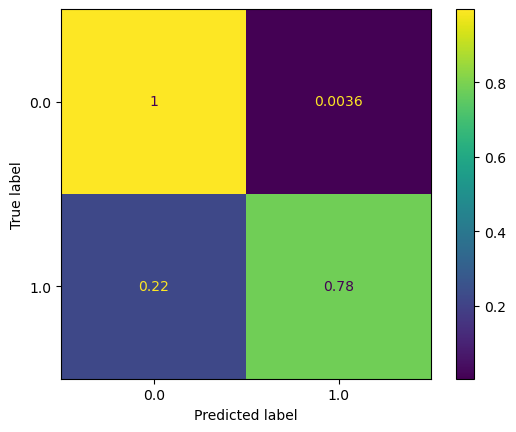

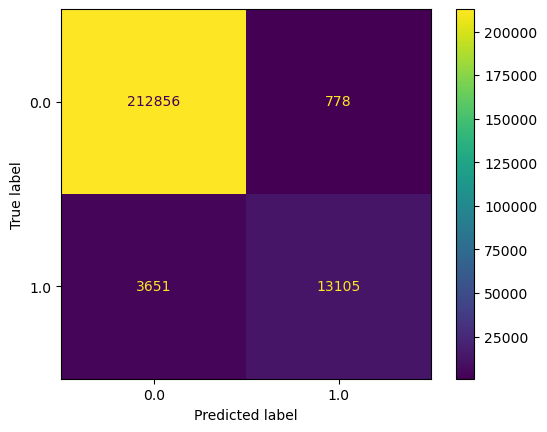

In [5]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_pred=y_pred, y_true = y_test)

_ = ConfusionMatrixDisplay.from_estimator(rf, X, tces['injrec'], normalize='true')
_ = ConfusionMatrixDisplay.from_estimator(rf, X, tces['injrec'])

Cross Validation Score mean: 0.869775
Accuracy: 0.8678111029124528
Precision: 0.122137, Recall: 0.134980


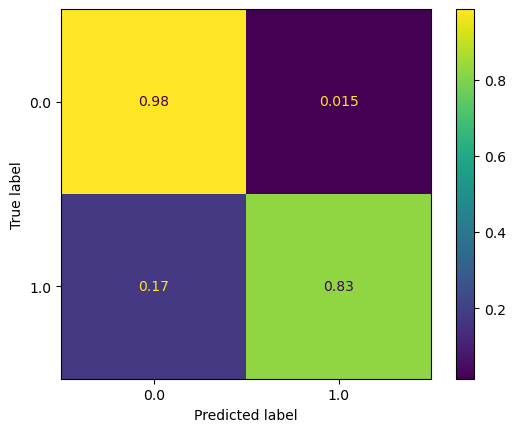

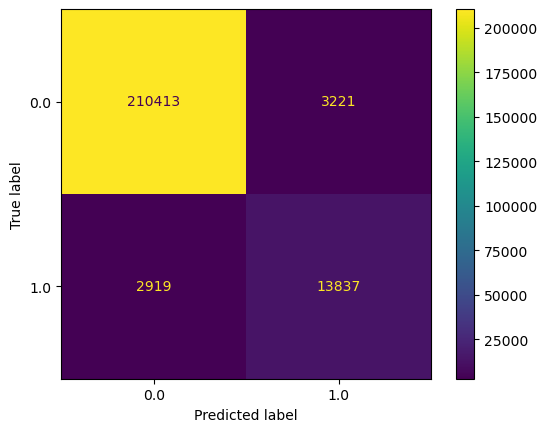

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

rf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
scores= cross_val_score(rf, X_train, y_train, cv=6)
print("Cross Validation Score mean: %f" % scores.mean())

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision: %f, Recall: %f" % (precision, recall))

cm = confusion_matrix(y_pred=y_pred, y_true = y_test)

_ = ConfusionMatrixDisplay.from_estimator(rf, X, tces['injrec'], normalize='true')
_ = ConfusionMatrixDisplay.from_estimator(rf, X, tces['injrec'])

In [7]:
## What sort of features are most important
isort = np.argsort(rf.feature_importances_)
for i,m in enumerate(metrics):
    print(m, 100*rf.feature_importances_[i])

dur 50.470930221028084
logg 26.417047383861668
Teff 23.11202239511024
